In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [24]:
data = pd.read_csv('./data/data.csv')
data.head()

,CuChun,JingChun,ErJiaMi,CuSuan,YiChangYiErChun,ErChangYiErChun,YeTiChanPin,YiJing,FaDianLiang,YiQiYouXiaoQi,ErQiYouXiaoQi,YiErChunQingZuFen,YiErChunZhongZuFen,RanMei
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,438.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,433.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,432.0


**Note**: (365,14) is the data frame's shape

In [25]:
# uncomment below to get more info about data
# print(data.dtypes)


Down below we perform PCA on data.

In [26]:
data = data.fillna(0) # 根据节假日置零!
c_feature = data.drop(['RanMei'], axis=1)
c_target = data['RanMei']
c_feature.head()

,CuChun,JingChun,ErJiaMi,CuSuan,YiChangYiErChun,ErChangYiErChun,YeTiChanPin,YiJing,FaDianLiang,YiQiYouXiaoQi,ErQiYouXiaoQi,YiErChunQingZuFen,YiErChunZhongZuFen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


## Standardization and SVD

In [27]:
c_mean = np.mean(c_feature, axis=0)
c_std = np.std(c_feature, axis=0)
c_standardized = (c_feature - c_mean) / c_std
c_mean, c_std

(CuChun                1289.528767
 JingChun               999.427397
 ErJiaMi                137.295890
 CuSuan                1338.742466
 YiChangYiErChun          0.000000
 ErChangYiErChun        281.690411
 YeTiChanPin            125.989041
 YiJing                  26.378082
 FaDianLiang             26.273973
 YiQiYouXiaoQi          170.602740
 ErQiYouXiaoQi          253.643836
 YiErChunQingZuFen       20.079452
 YiErChunZhongZuFen       3.301370
 dtype: float64,
 CuChun                353.686646
 JingChun              474.761118
 ErJiaMi               146.833911
 CuSuan                367.494232
 YiChangYiErChun         0.000000
 ErChangYiErChun       268.390964
 YeTiChanPin            64.357221
 YiJing                  6.583879
 FaDianLiang            18.716609
 YiQiYouXiaoQi         159.084464
 ErQiYouXiaoQi         108.403226
 YiErChunQingZuFen      19.810243
 YiErChunZhongZuFen      3.280849
 dtype: float64)

In [29]:
u0, s0, vt0 = np.linalg.svd(c_standardized)
u0.shape, s0, vt0.shape

LinAlgError: SVD did not converge

看上去SVD没有收敛，很有意思的情况

猜想：
1. 矩阵不满秩--->全是0行?
2. 有NaN

In [30]:
c_standardized = c_standardized.drop(index=c_standardized[(c_standardized == 0.0).all(axis=1)].index)

In [31]:
c_standardized.shape

(365, 13)

猜想1不成立

In [32]:
c_standardized

,CuChun,JingChun,ErJiaMi,CuSuan,YiChangYiErChun,ErChangYiErChun,YeTiChanPin,YiJing,FaDianLiang,YiQiYouXiaoQi,ErQiYouXiaoQi,YiErChunQingZuFen,YiErChunZhongZuFen
0,-3.645964,-2.105116,-0.935042,-3.642894,NaN,-1.049553,-1.957652,-4.006465,-1.403778,-1.072404,-2.339818,-1.013589,-1.006255
1,-3.645964,-2.105116,-0.935042,-3.642894,NaN,-1.049553,-1.957652,-4.006465,-1.403778,-1.072404,-2.339818,-1.013589,-1.006255
2,-3.645964,-2.105116,-0.935042,-3.642894,NaN,-1.049553,-1.957652,-3.095148,-1.403778,-1.072404,-2.339818,-1.013589,-1.006255
3,-3.645964,-2.105116,-0.935042,-3.642894,NaN,-1.049553,-1.957652,-3.398921,-1.403778,-1.072404,-2.339818,-1.013589,-1.006255
4,-3.645964,-2.105116,-0.935042,-3.642894,NaN,-1.049553,-1.957652,-2.791376,-1.403778,-1.072404,-2.339818,-1.013589,-1.006255
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.306687,0.837416,-0.935042,0.046960,NaN,0.906549,1.553997,0.246347,-0.495494,0.970536,-0.633227,0.955089,0.822540
361,0.301033,0.380344,-0.935042,0.038797,NaN,0.899097,1.522921,0.246347,-0.228352,0.976822,-0.624002,1.005568,0.822540
362,0.258622,0.711037,-0.935042,-0.031953,NaN,0.671817,1.274309,-0.361198,-0.014638,0.876247,-0.605552,0.854131,0.822540
363,0.479156,0.826884,-0.935042,-0.012905,NaN,0.932630,1.460768,0.094461,0.626504,1.008252,-0.587103,0.955089,0.822540


一厂乙二醇出现问题，舍去之

In [33]:
c_standardized = c_standardized.drop(['YiChangYiErChun'], axis=1)
c_standardized

,CuChun,JingChun,ErJiaMi,CuSuan,ErChangYiErChun,YeTiChanPin,YiJing,FaDianLiang,YiQiYouXiaoQi,ErQiYouXiaoQi,YiErChunQingZuFen,YiErChunZhongZuFen
0,-3.645964,-2.105116,-0.935042,-3.642894,-1.049553,-1.957652,-4.006465,-1.403778,-1.072404,-2.339818,-1.013589,-1.006255
1,-3.645964,-2.105116,-0.935042,-3.642894,-1.049553,-1.957652,-4.006465,-1.403778,-1.072404,-2.339818,-1.013589,-1.006255
2,-3.645964,-2.105116,-0.935042,-3.642894,-1.049553,-1.957652,-3.095148,-1.403778,-1.072404,-2.339818,-1.013589,-1.006255
3,-3.645964,-2.105116,-0.935042,-3.642894,-1.049553,-1.957652,-3.398921,-1.403778,-1.072404,-2.339818,-1.013589,-1.006255
4,-3.645964,-2.105116,-0.935042,-3.642894,-1.049553,-1.957652,-2.791376,-1.403778,-1.072404,-2.339818,-1.013589,-1.006255
...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.306687,0.837416,-0.935042,0.046960,0.906549,1.553997,0.246347,-0.495494,0.970536,-0.633227,0.955089,0.822540
361,0.301033,0.380344,-0.935042,0.038797,0.899097,1.522921,0.246347,-0.228352,0.976822,-0.624002,1.005568,0.822540
362,0.258622,0.711037,-0.935042,-0.031953,0.671817,1.274309,-0.361198,-0.014638,0.876247,-0.605552,0.854131,0.822540
363,0.479156,0.826884,-0.935042,-0.012905,0.932630,1.460768,0.094461,0.626504,1.008252,-0.587103,0.955089,0.822540


In [34]:
u1, s1, vt1 = np.linalg.svd(c_standardized)
u1.shape, s1, vt1.shape

((365, 365),
 array([48.24925645, 33.54667828, 16.95466371, 16.56769073, 12.41264861,
         8.39325961,  6.68966403,  6.41983049,  4.87595721,  4.51796102,
         2.9331626 ,  1.18481084]),
 (12, 12))

In [35]:
c_total_variance = np.sum(s1**2) / len(c_standardized)
print("iris_total_variance: {:.3f} should approximately equal the sum of the feature variances: {:.3f}"
      .format(c_total_variance, np.sum(np.var(c_standardized, axis=0))))


iris_total_variance: 12.000 should approximately equal the sum of the feature variances: 12.000


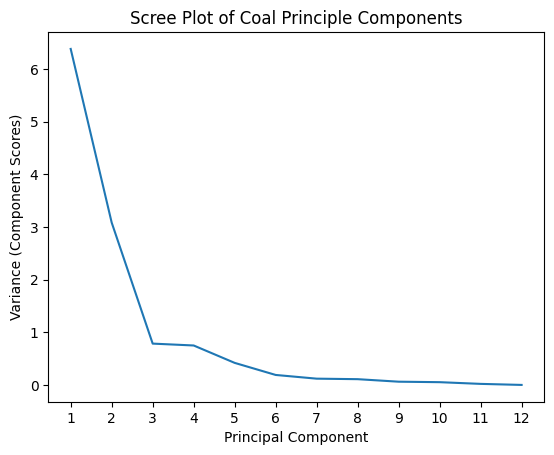

In [36]:
# your plot here
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.xlabel("Principal Component")
plt.ylabel("Variance (Component Scores)")
plt.title("Scree Plot of Coal Principle Components")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], np.square(s1) / len(c_standardized));


In [37]:
c_3d_variance = np.sum(s1[:3]**2) / len(c_standardized) / c_total_variance



c_4d_variance = np.sum(s1[:4]**2) / len(c_standardized) / c_total_variance
c_3d_variance, c_4d_variance


(0.8540710029747697, 0.9167395820053994)

由此可见前4个特征占方差了91%左右的比重

降维到4维

In [38]:
c_4d = c_standardized @ vt1[0:4, :].T
c_4d

,0,1,2,3
0,-4.219596,6.555128,-1.115751,0.887255
1,-4.219596,6.555128,-1.115751,0.887255
2,-4.060535,6.276841,-0.941865,0.297959
3,-4.113555,6.369603,-0.999827,0.494391
4,-4.007515,6.184079,-0.883903,0.101528
...,...,...,...,...
360,2.527929,0.518452,0.519425,0.706511
361,2.472953,0.596674,0.567352,0.387806
362,2.204427,0.665518,0.011368,0.757959
363,2.746452,0.315782,-0.209918,0.221476


三维可视化看一看

In [39]:
c_3d = c_standardized @ vt1[0:3, :].T
c_3d

,0,1,2
0,-4.219596,6.555128,-1.115751
1,-4.219596,6.555128,-1.115751
2,-4.060535,6.276841,-0.941865
3,-4.113555,6.369603,-0.999827
4,-4.007515,6.184079,-0.883903
...,...,...,...
360,2.527929,0.518452,0.519425
361,2.472953,0.596674,0.567352
362,2.204427,0.665518,0.011368
363,2.746452,0.315782,-0.209918


In [40]:
c_3d = c_3d.rename(columns = {0: "pc1", 1: "pc2", 2: "pc3"})
# fig = px.scatter_3d(colorize_surfboard_data(c_3d, x='pc1', y='pc2', z='pc3', range_x = [-10, 10], range_y = [-10, 10], range_z = [-10, 10], color = 'color', color_continuous_scale = 'RdBu');
fig = px.scatter_3d(c_3d,x='pc1', y='pc2', z='pc3', color='pc1')
fig.show();


## Whitening with PCA
考虑PCA白化数据集，通过标准化数据的协方差矩阵来使数据具有单位方差和零均值，从而使得数据在各个维度上具有相同的分布。白化可以提高模型的训练效率和性能

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
# c_standardized 已经是标准化的数据了
pca = PCA(n_components=4)
c_pca = pca.fit_transform(c_standardized)
scaler_whiten = StandardScaler()
c_whitened = scaler_whiten.fit_transform(c_pca)

In [43]:
print("PCA components variance:", np.var(c_pca, axis=0))
print("Whitened data mean:", np.mean(c_whitened, axis=0))
print("Whitened data variance:", np.var(c_whitened, axis=0))

PCA components variance: [6.37805684 3.08323184 0.78756335 0.75202295]
Whitened data mean: [-1.52085346e-18  1.01288840e-16 -6.96550884e-17  7.42176488e-17]
Whitened data variance: [1. 1. 1. 1.]


now the `c_whitened` can be used for further analysis.